## Libraries

In [42]:
## For loading the pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Clear Output
from IPython.display import clear_output

## load Database

In [43]:
## Read the dataframe
df = pd.read_pickle("../../data/ufficial/pickle/session.pkl")
## Make time in Minutes
df["time"] /= 6E4

## Functions

### Graph

In [57]:
## Algo for creating the graph
def createGraph(top5, values):
    ## Use this style for the plot
    plt.style.use("ggplot")
    ## Incr the size
    plt.figure(figsize=(15,7))
    ## Put it on the graph
    plt.barh(top5.index.astype(str), top5.values)
    ## Order it
    plt.gca().invert_yaxis()
    ## Make x bigger
    xmin, xmax = plt.xlim()
    plt.xlim(xmin, xmax*1.1)

    ## Add %
    for index, value in enumerate(top5):
        plt.text(value, index, "   " + str(values[index]) + " | " + str(value) + "%" )

    ## Show
    plt.show()

### Informations

In [62]:
def getInfoOne(wanted):
    baseClass = pd.DataFrame({
        wanted: [],
        "Num": [],
        "Perc": []
    })
    ## Lets make a classification of the session time
    baseClass = df.sort_values(by=[wanted],  ascending=False)[[wanted, "name"]].reset_index()
    baseClass.index += 1
    ## Lets remove the column index
    baseClass = baseClass.drop("index", axis = 1)
    
    dbExport = baseClass.copy()
    dbExport["perc"] = baseClass[wanted].copy() / df[wanted].sum() * 100
    
    ## Export
    dbExport.to_csv("../../results/session/%s/%sOne.csv" % (wanted, wanted))
    
    ## Print the first
    print("One Max: Name: %s with %s" % \
          (dbExport.iloc[0]["name"],\
           dbExport.iloc[0][wanted]))
    
    ## Create Graph
    createGraph(dbExport.drop_duplicates(subset=["name"]).set_index("name")[:5].\
                drop(columns = [wanted]).squeeze().round(3),
                dbExport[wanted].values.round(3)
               )
    

In [59]:
def getInfoAll(want):
    registredKills = df[want].sum()
    genClass = pd.DataFrame({
        want: [],
        "Num": [],
        "Perc": []
    })
    rif = df.groupby("name")[want].sum().sort_values(ascending = False)
    ## Print killers 
    ris = pd.DataFrame(rif).reset_index()
    
    dbExport = ris.copy()
    dbExport["perc"] = ris[want] / registredKills * 100
    
    ## Export this
    dbExport.to_csv("../../results/session/%s/%sAll.csv" % (want,want))
    
    print("All Max: Name: %s with %s" % \
          (dbExport.iloc[0]["name"],\
           dbExport.iloc[0][want]))
    
    ## Graph first 5 killers
    createGraph(((rif / registredKills * 100)[:5])[:5].round(3), rif.values.round(3))

In [60]:
def getSum(want):
    print(want + " total: %f" % df[want].sum())

## Data extraction (simple)

### Session Login

In [48]:
## First and last login
print("First: %s\tLast: %s" % (df.iloc[0]["name"], df.iloc[-1]["name"]))
## For the first and last logout, go to analysis_core_protector
'''
 The result is: First: b751b9ef-2b6f-4678-9908-718bf93d7089	Last: 01d133c2-d7ee-4808-906f-4601b9f285fe
 Lets get their name.
 First: SalC1, Last: spit4520.
 There are a lot of people that log-out at the last moment, the last registred is CactusDuper, but the others are:
 6d026b92-5b15-4555-84fd-db4d1162eac9 : CactusDuper
 13ed27d3-b345-4bac-aae4-497d8e30dd9b : WittleRain
 c0ce433b-c1de-4535-a2e5-4a22e621759d : mcrcortex
 Lol, the first and last login are the same as first and last log-out
'''
''''''

First: SalC1	Last: spit4520


''

### Session Time

One Max: Name: checkmate007 with 1930.1144333333334


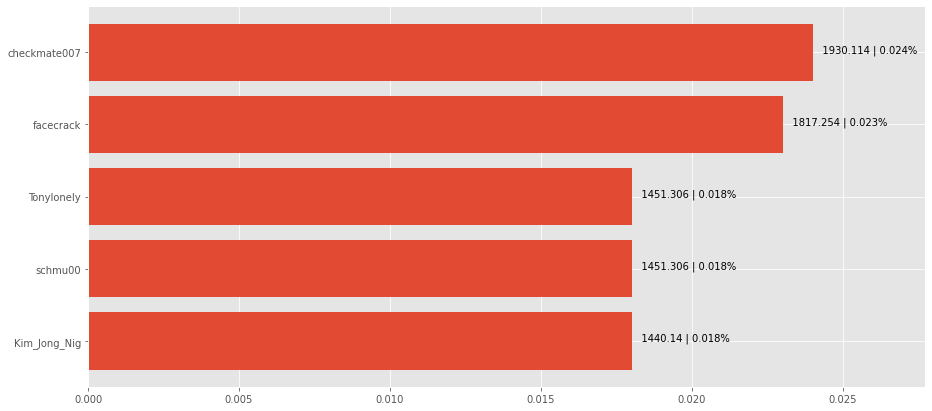

All Max: Name: moooomoooo with 81682.15391666682


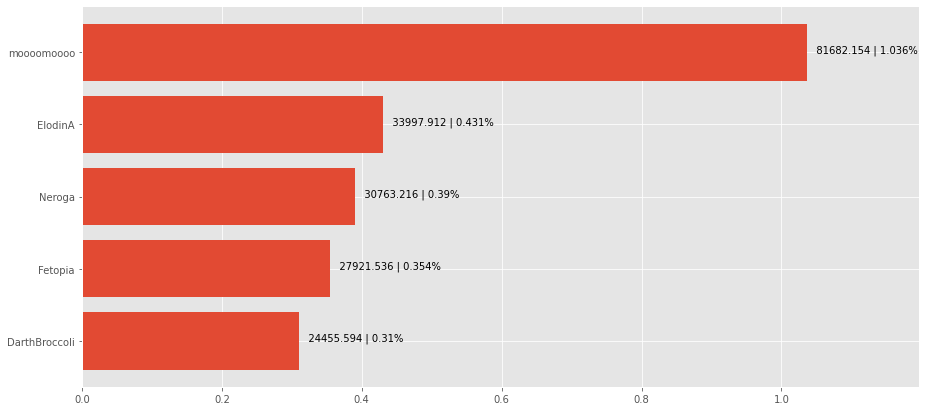

time total: 7886492.659133


In [49]:
getInfoOne("time")
getInfoAll("time")
getSum("time")

### Mob Killed

One Max: Name: ShadowGirl379 with 3409.0


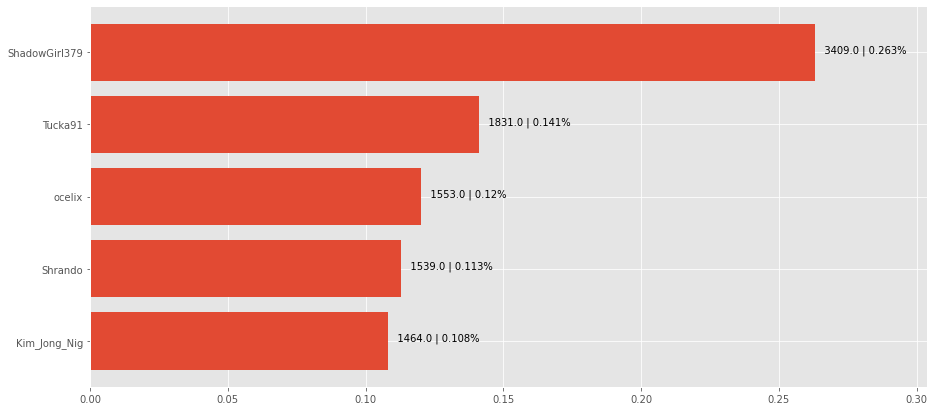

All Max: Name: ocelix with 30979.0


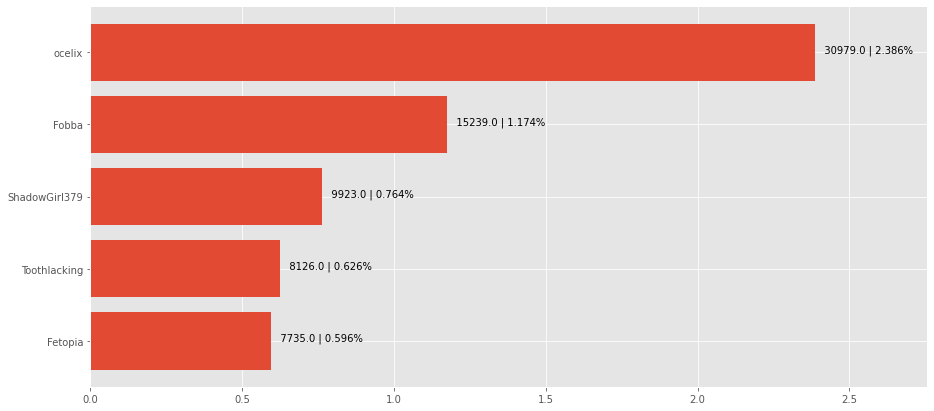

mob_kills total: 1298099.000000


In [63]:
getInfoOne("mob_kills")
getInfoAll("mob_kills")
getSum("mob_kills")

### Deaths

One Max: Name: DoubleSpexon with 6558.0


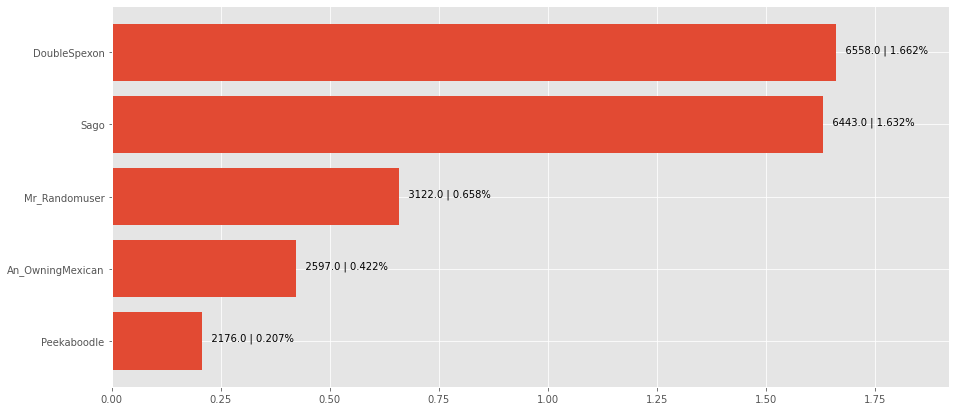

All Max: Name: Mr_Randomuser with 36301.0


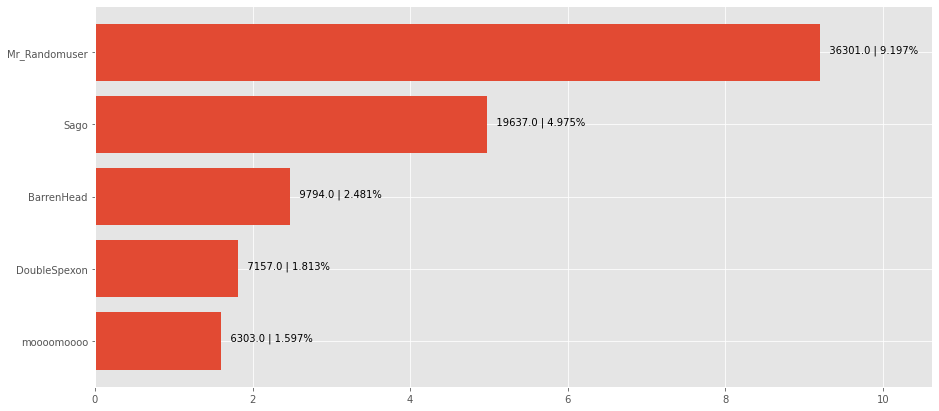

deaths total: 394691.000000


In [64]:
getInfoOne("deaths")
getInfoAll("deaths")
getSum("deaths")

### Afk Time

One Max: Name: facecrack with 106887194.0


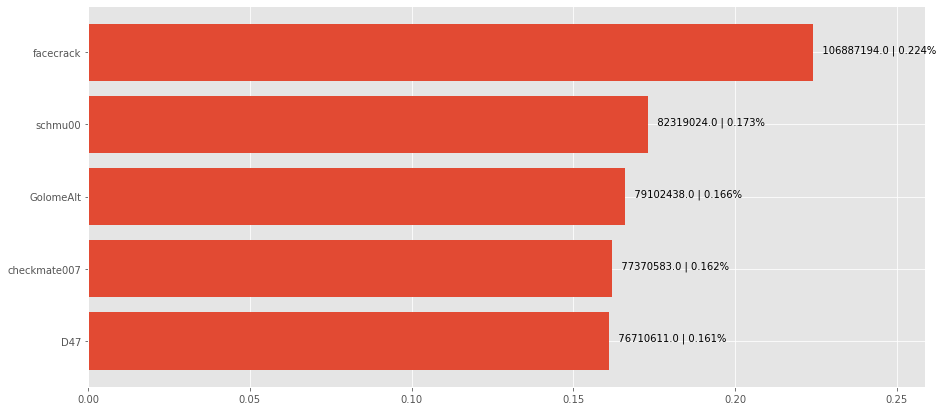

All Max: Name: The_Penguin with 1074230235.0


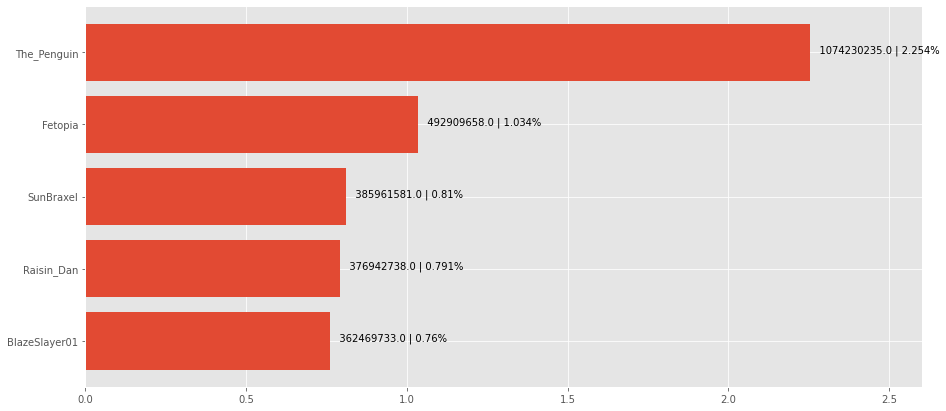

afk_time total: 47664846681.000000


In [65]:
getInfoOne("afk_time")
getInfoAll("afk_time")
getSum("afk_time")